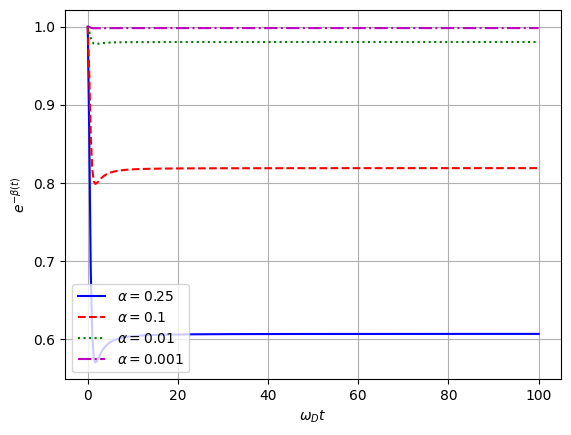

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import jv 

omega_D = 1
t_vals = np.linspace(0.01, 100, 300)
omegaDt = omega_D * t_vals

alphas = [0.25, 0.1, 0.01, 0.001]
styles = ['b-', 'r--', 'g:', 'm-.']
labels = [r'$\alpha=0.25$', r'$\alpha=0.1$', r'$\alpha=0.01$', r'$\alpha=0.001$']


def J(omega, t, omega_D):
    return omega * np.exp(-omega / omega_D) * np.sin(omega * t / 2)**2

for alpha, style, label in zip(alphas, styles, labels):
    beta_vals = []
    for t in t_vals:
        integral, _ = quad(J, 0, np.inf, args=(t, omega_D),limit=500)
        beta_t = 4 * alpha * integral
        beta_vals.append(np.exp(-beta_t))
    
    plt.plot(omegaDt, beta_vals, style, label=label)

plt.xlabel(r'$\omega_D t$')
plt.ylabel(r'$e^{-\beta(t)}$')
plt.grid(True)
plt.legend()
plt.show()


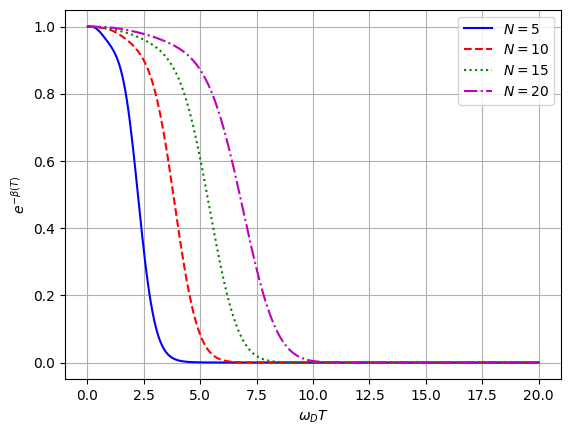

In [35]:
omega_D = 1
alpha = 0.25
T_vals = np.linspace(0.01, 20, 300)
omegaDT = omega_D * T_vals

N_vals = [5, 10, 15, 20]
styles = ['b-', 'r--', 'g:', 'm-.']
labels = [rf'$N={N}$' for N in N_vals]

def J(omega, alpha, omega_D):
    return 2 * alpha * omega**3 * np.exp(-omega / omega_D)

def cpmg(omega, T, N):
    if N % 2 == 0:  
        return (4 / omega**2) * np.tan(omega * T / (2 * N + 2))**2 * np.cos(omega * T / 2)**2
    else: 
        return (4 / omega**2) * np.tan(omega * T / (2 * N + 2))**2 * np.sin(omega * T / 2)**2

def integrand(omega, T, alpha, N, omega_D):
    return J(omega, alpha, omega_D) * cpmg(omega, T, N)


for N, style, label in zip(N_vals, styles, labels):
    beta_vals = []
    for T in T_vals:
        result, _ = quad(integrand, 0.01, 50, args=(T, alpha, N, omega_D))
        beta_vals.append(np.exp(-result))
    
    plt.plot(omegaDT, beta_vals, style, label=label)

plt.xlabel(r'$\omega_D T$')
plt.ylabel(r'$e^{-\beta(T)}$')
plt.grid(True)
plt.legend()
plt.show()


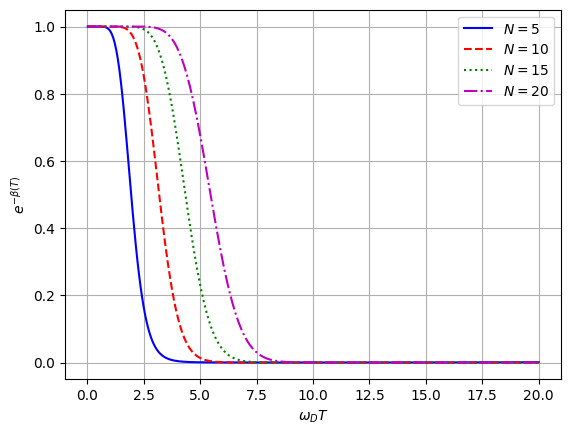

In [36]:
omega_D = 1
alpha = 0.25
T_vals = np.linspace(0.01, 20, 300)
omegaDT = omega_D * T_vals

N_vals = [5, 10, 15, 20]
styles = ['b-', 'r--', 'g:', 'm-.']
labels = [rf'$N={N}$' for N in N_vals]

def J(omega, alpha, omega_D):
    return 2 * alpha * omega**3 * np.exp(-omega / omega_D)

def udd(omega, T, N):
    arg = omega * T / 2
    return (16 * (N + 1)**2 / omega**2) * jv(N + 1, arg)**2

def integrand(omega, T, alpha, N, omega_D):
    return J(omega, alpha, omega_D) * udd(omega, T, N)

for N, style, label in zip(N_vals, styles, labels):
    beta_vals = []
    for T in T_vals:
        result, _ = quad(integrand, 0.01, 50, args=(T, alpha, N, omega_D)) 
        beta_vals.append(np.exp(-result))
    
    plt.plot(omegaDT, beta_vals, style, label=label)

plt.xlabel(r'$\omega_D T$')
plt.ylabel(r'$e^{-\beta(T)}$')
plt.grid(True)
plt.legend()
plt.show()
